In [1]:
import pandas as pd
import numpy as np


In [73]:
diagnosis = pd.read_csv('../data/DIAGNOSIS.csv')
demographics = pd.read_csv('../data/DEMOGRAPHICS.csv')
apoe = pd.read_csv('../data/APOE.csv')

apoe['APOE41'] = apoe['GENOTYPE'].apply(lambda x: 1 if x == '3/4' else 0)
apoe = apoe[['RID', 'APOE41']]
demographics = demographics[['RID', 'PTDOB', 'PTGENDER', 'PTEDUCAT', 'PTRACCAT']]
demographics = demographics.drop_duplicates(subset=['RID'])
diagnosis = diagnosis[['RID', 'VISCODE2', 'DIAGNOSIS', 'EXAMDATE']]

merged_df = pd.merge(demographics, apoe, on='RID', how='inner')
merged_df = pd.merge(merged_df, diagnosis, on='RID', how='right')
merged_df = merged_df.dropna()
merged_df['PTDOB'] = pd.to_datetime(merged_df['PTDOB'], errors='coerce')
merged_df['EXAMDATE'] = pd.to_datetime(merged_df['EXAMDATE'], errors='coerce')
merged_df['AGE'] = (merged_df['EXAMDATE'] - merged_df['PTDOB']).dt.days / 365.25

merged_df = merged_df.sort_values(by=['RID', 'EXAMDATE'])

/var/folders/g3/2dtjm6cd09v21m_fw6x_ggx00000gp/T/ipykernel_15367/1553594485.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_df['PTDOB'] = pd.to_datetime(merged_df['PTDOB'], errors='coerce')


In [74]:
mri_data = pd.read_csv('/Users/nataliaglazman/Downloads/ARC Builder MRI Key Oct 17 2025.csv')


In [75]:
ucsf1 = pd.read_csv('../data/UCSF_1.csv')
ucsf2 = pd.read_csv('../data/UCSF_6.csv')
ucsf3 = pd.read_csv('../data/UCSF7.csv')
ucsf4 = pd.read_csv('../data/UCSF71.csv')

ucsf4

/var/folders/g3/2dtjm6cd09v21m_fw6x_ggx00000gp/T/ipykernel_15367/2142418536.py:4: DtypeWarning: Columns (11,12,13,14,15,16,17,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  ucsf4 = pd.read_csv('../data/UCSF71.csv')


,PHASE,PTID,RID,VISCODE,VISCODE2,IMAGEUID,FIELD_STRENGTH,EXAMDATE,RUNDATE,STATUS,...,ST147SV,ST148SV,ST149SV,ST150SV,ST151SV,ST152SV,ST153SV,ST154SV,ST155SV,update_stamp
0,ADNI3,002_S_4213,4213,init,m72,888008,3T,2017-08-14,2022-07-23,partial,...,217434.885092,217173.802571,434608.687663,175240.0,171111.0,346351.0,47936.0,576920.687663,874725.0,2024-12-02 08:27:54.0
1,ADNI2,116_S_4453,4453,v02,scmri,281425,3T,2012-01-18,2022-10-05,partial,...,224522.552452,221805.186019,446327.738471,225291.0,221178.0,446469.0,50711.0,599707.738471,984072.0,2024-12-02 08:27:54.0
2,ADNI2,099_S_4104,4104,v11,m12,322667,3T,2012-07-11,2022-09-26,partial,...,219930.656696,224579.475317,444510.132013,199702.0,200555.0,400257.0,52008.0,596412.132013,928837.0,2024-12-02 08:27:54.0
3,ADNI2,073_S_2153,2153,v21,m36,417092,3T,2014-03-03,2022-08-14,partial,...,200725.779310,201273.901030,401999.680340,174186.0,176432.0,350618.0,49603.0,538118.680340,846706.0,2024-12-02 08:27:54.0
4,ADNI2,137_S_4303,4303,v04,m03,288921,3T,2012-02-27,2022-10-05,partial,...,198949.362921,200313.596282,399262.959202,202949.5,196986.5,399936.0,47355.0,543084.959202,902306.0,2024-12-02 08:27:54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11940,ADNI4,381_S_10614,10614,4_sc,sc,11197244,3T,2025-04-11,2025-07-14,complete,...,243329.888760,242415.631729,485745.520489,247151.0,240752.0,487903.0,62028.0,678597.520489,1060804.0,2025-07-29 07:13:14.0
11941,ADNI1,136_S_0429,429,m12,m12,83549,3T,2007-06-18,2025-05-31,partial,...,241279.283552,246674.651939,487953.935491,287421.0,291222.0,578643.0,65238.0,659738.935491,1166951.0,2025-07-29 07:13:14.0
11942,ADNI1,082_S_1256,1256,m06,m06,80370,3T,2007-10-04,2025-05-31,partial,...,208804.120506,209230.443194,418034.563700,196441.0,191284.0,387725.0,49241.0,562012.563700,868354.0,2025-07-29 07:13:14.0
11943,ADNI1,002_S_1070,1070,m18,m18,120784,3T,2008-08-13,2025-05-31,partial,...,189791.250453,205327.844699,395119.095152,245298.5,250383.5,495682.0,56586.0,569059.095152,1011044.0,2025-07-29 07:13:14.0


In [76]:
mri_data['PTID'] = mri_data['subject_id']
mri_data['EXAMDATE'] = pd.to_datetime(mri_data['image_date'], errors='coerce')
ucsf4['EXAMDATE'] = pd.to_datetime(ucsf4['EXAMDATE'], errors='coerce')
# merge on PTID and EXAMDATE
# closest_match = pd.merge_asof(mri_data.sort_values('EXAMDATE'), ucsf4.sort_values('EXAMDATE'),
#                               by='PTID',
#                               left_on='EXAMDATE',
#                               right_on='EXAMDATE',
#                               direction='nearest',
#                               tolerance=pd.Timedelta('2 days'))
# convert IMAGEUID to integer
mri_data['IMAGEUID'] = mri_data['image_id'].astype(int)
ucsf4['IMAGEUID'] = ucsf4['IMAGEUID'].astype(int)

closest_match = pd.merge(mri_data, ucsf4, on=['PTID', 'EXAMDATE', 'IMAGEUID'], how='right')
# drop rows with NaN values in ST10CV
closest_match = closest_match.dropna(subset=['ST10CV'])
closest_match

,image_id,subject_id,image_visit,image_date,series_type,mri_protocol_phase,series_description,acceleration,acquisition_type,acquisition_plane,...,ST147SV,ST148SV,ST149SV,ST150SV,ST151SV,ST152SV,ST153SV,ST154SV,ST155SV,update_stamp
0,888008.0,002_S_4213,init,2017-08-14,T1w,ADNI3,Accelerated Sagittal MPRAGE,Accelerated,3D,Sagittal,...,217434.885092,217173.802571,434608.687663,175240.0,171111.0,346351.0,47936.0,576920.687663,874725.0,2024-12-02 08:27:54.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,224522.552452,221805.186019,446327.738471,225291.0,221178.0,446469.0,50711.0,599707.738471,984072.0,2024-12-02 08:27:54.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,219930.656696,224579.475317,444510.132013,199702.0,200555.0,400257.0,52008.0,596412.132013,928837.0,2024-12-02 08:27:54.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,200725.779310,201273.901030,401999.680340,174186.0,176432.0,350618.0,49603.0,538118.680340,846706.0,2024-12-02 08:27:54.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,198949.362921,200313.596282,399262.959202,202949.5,196986.5,399936.0,47355.0,543084.959202,902306.0,2024-12-02 08:27:54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11940,11197244.0,381_S_10614,4_sc,2025-04-11,T1w,ADNI4,Accelerated Sagittal MPRAGE (MSV21),Accelerated,3D,Sagittal,...,243329.888760,242415.631729,485745.520489,247151.0,240752.0,487903.0,62028.0,678597.520489,1060804.0,2025-07-29 07:13:14.0
11941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,241279.283552,246674.651939,487953.935491,287421.0,291222.0,578643.0,65238.0,659738.935491,1166951.0,2025-07-29 07:13:14.0
11942,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,208804.120506,209230.443194,418034.563700,196441.0,191284.0,387725.0,49241.0,562012.563700,868354.0,2025-07-29 07:13:14.0
11943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,189791.250453,205327.844699,395119.095152,245298.5,250383.5,495682.0,56586.0,569059.095152,1011044.0,2025-07-29 07:13:14.0


In [77]:
closest_match[['PTID', 'image_id', 'scanner_model', 'IMAGEUID', 'EXAMDATE', 'RID', 'VISCODE2', 'image_visit', 'FIELD_STRENGTH', 'ST29SV']]
# closest_match.dropna(how='any', subset=['scanner_model'])

,PTID,image_id,scanner_model,IMAGEUID,EXAMDATE,RID,VISCODE2,image_visit,FIELD_STRENGTH,ST29SV
0,002_S_4213,888008.0,Prisma_fit,888008,2017-08-14,4213,m72,init,3T,3661.3
1,116_S_4453,NaN,NaN,281425,2012-01-18,4453,scmri,NaN,3T,3711.5
2,099_S_4104,NaN,NaN,322667,2012-07-11,4104,m12,NaN,3T,3356.8
3,073_S_2153,NaN,NaN,417092,2014-03-03,2153,m36,NaN,3T,4168.4
4,137_S_4303,NaN,NaN,288921,2012-02-27,4303,m03,NaN,3T,2721.5
...,...,...,...,...,...,...,...,...,...,...
11940,381_S_10614,11197244.0,MAGNETOM Skyra,11197244,2025-04-11,10614,sc,4_sc,3T,3877.3
11941,136_S_0429,NaN,NaN,83549,2007-06-18,429,m12,NaN,3T,4252.1
11942,082_S_1256,NaN,NaN,80370,2007-10-04,1256,m06,NaN,3T,3640.5
11943,002_S_1070,NaN,NaN,120784,2008-08-13,1070,m18,NaN,3T,4321.3


In [78]:
closest_match['scanner_manufacturer'].value_counts()

scanner_manufacturer
SIEMENS    1388
GE          682
Siemens     611
PHILIPS     342
Philips      98
Other         1
Name: count, dtype: int64

In [79]:
closest_match.isna().sum()[0:50]

image_id                    8819
subject_id                  8819
image_visit                 8819
image_date                  8819
series_type                 8819
mri_protocol_phase          8819
series_description          8819
acceleration                8819
acquisition_type            8819
acquisition_plane           8819
number_volumes              8819
slices_per_volume           8819
slice_thickness             8819
scanner_manufacturer        8819
scanner_model               8819
software_version            8819
magnetic_field_strength     8819
receive_coil_name           8844
study_instance_uid          8819
series_instance_uid         8819
loni_study                  8819
loni_series                 8819
loni_image                  8819
PTID                           0
EXAMDATE                       0
IMAGEUID                       0
PHASE                          0
RID                            0
VISCODE                        0
VISCODE2                       3
FIELD_STRE

In [80]:
ucsf4['FIELD_STRENGTH'].value_counts()

FIELD_STRENGTH
3T      7465
1.5T    4480
Name: count, dtype: int64

In [81]:
ucsf1 = pd.read_csv('../data/UCSF_1.csv')
ucsf2 = pd.read_csv('../data/UCSF_6.csv')
ucsf3 = pd.read_csv('../data/UCSF7.csv')
ucsf4 = pd.read_csv('../data/UCSF71.csv')

common_cols = list(set(ucsf1.columns) & set(ucsf2.columns) & set(ucsf3.columns))

# Optionally: keep them in the same order as in ucsf4
common_cols = [col for col in ucsf3.columns if col in common_cols]

ucsf1 = ucsf1[common_cols]
ucsf2 = ucsf2[common_cols]
ucsf3 = ucsf3[common_cols]
# ucsf4 = ucsf4[common_cols]


def get_keys(df):
    return set(df['IMAGEUID'])

keys_combined = get_keys(ucsf3)
keys_expected = get_keys(ucsf1) | get_keys(ucsf2) | get_keys(ucsf3)

# Check if all keys in keys_combined are in keys_expected
missing_keys = keys_expected - keys_combined

# # add missing keys to ucsf4
# for key in missing_keys:
#     rid = key
#     # Find the corresponding row in ucsf1, ucsf2, or ucsf3
#     for df in [ucsf1, ucsf2, ucsf3]:
#         if key in get_keys(df):
#             missing_row = df[(df['IMAGEUID'] == rid)]
#             if not missing_row.empty and key not in get_keys(ucsf3):
#                 # Append the row to ucsf4
#                 ucsf3 = pd.concat([ucsf3, missing_row], ignore_index=True)
#                 # remove the key from missing_keys

ucsf4

/var/folders/g3/2dtjm6cd09v21m_fw6x_ggx00000gp/T/ipykernel_15367/674481134.py:4: DtypeWarning: Columns (11,12,13,14,15,16,17,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  ucsf4 = pd.read_csv('../data/UCSF71.csv')


,PHASE,PTID,RID,VISCODE,VISCODE2,IMAGEUID,FIELD_STRENGTH,EXAMDATE,RUNDATE,STATUS,...,ST147SV,ST148SV,ST149SV,ST150SV,ST151SV,ST152SV,ST153SV,ST154SV,ST155SV,update_stamp
0,ADNI3,002_S_4213,4213,init,m72,888008,3T,2017-08-14,2022-07-23,partial,...,217434.885092,217173.802571,434608.687663,175240.0,171111.0,346351.0,47936.0,576920.687663,874725.0,2024-12-02 08:27:54.0
1,ADNI2,116_S_4453,4453,v02,scmri,281425,3T,2012-01-18,2022-10-05,partial,...,224522.552452,221805.186019,446327.738471,225291.0,221178.0,446469.0,50711.0,599707.738471,984072.0,2024-12-02 08:27:54.0
2,ADNI2,099_S_4104,4104,v11,m12,322667,3T,2012-07-11,2022-09-26,partial,...,219930.656696,224579.475317,444510.132013,199702.0,200555.0,400257.0,52008.0,596412.132013,928837.0,2024-12-02 08:27:54.0
3,ADNI2,073_S_2153,2153,v21,m36,417092,3T,2014-03-03,2022-08-14,partial,...,200725.779310,201273.901030,401999.680340,174186.0,176432.0,350618.0,49603.0,538118.680340,846706.0,2024-12-02 08:27:54.0
4,ADNI2,137_S_4303,4303,v04,m03,288921,3T,2012-02-27,2022-10-05,partial,...,198949.362921,200313.596282,399262.959202,202949.5,196986.5,399936.0,47355.0,543084.959202,902306.0,2024-12-02 08:27:54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11940,ADNI4,381_S_10614,10614,4_sc,sc,11197244,3T,2025-04-11,2025-07-14,complete,...,243329.888760,242415.631729,485745.520489,247151.0,240752.0,487903.0,62028.0,678597.520489,1060804.0,2025-07-29 07:13:14.0
11941,ADNI1,136_S_0429,429,m12,m12,83549,3T,2007-06-18,2025-05-31,partial,...,241279.283552,246674.651939,487953.935491,287421.0,291222.0,578643.0,65238.0,659738.935491,1166951.0,2025-07-29 07:13:14.0
11942,ADNI1,082_S_1256,1256,m06,m06,80370,3T,2007-10-04,2025-05-31,partial,...,208804.120506,209230.443194,418034.563700,196441.0,191284.0,387725.0,49241.0,562012.563700,868354.0,2025-07-29 07:13:14.0
11943,ADNI1,002_S_1070,1070,m18,m18,120784,3T,2008-08-13,2025-05-31,partial,...,189791.250453,205327.844699,395119.095152,245298.5,250383.5,495682.0,56586.0,569059.095152,1011044.0,2025-07-29 07:13:14.0


In [82]:
ucsf4[ucsf4['RID'] == 413].sort_values(by='EXAMDATE')

,PHASE,PTID,RID,VISCODE,VISCODE2,IMAGEUID,FIELD_STRENGTH,EXAMDATE,RUNDATE,STATUS,...,ST147SV,ST148SV,ST149SV,ST150SV,ST151SV,ST152SV,ST153SV,ST154SV,ST155SV,update_stamp
8222,ADNI1,002_S_0413,413,sc,sc,118673,1.5T,2006-05-02,2024-12-06,partial,...,220912.635784,226085.563718,446998.199502,228084.0,227588.0,455672.0,47842.0,590206.199502,986941.0,2025-05-12 13:00:31.0
11925,ADNI1,002_S_0413,413,bl,bl,118675,3T,2006-05-19,2025-05-31,partial,...,226593.096784,228080.529173,454673.625957,217360.5,216650.5,434011.0,50824.0,598342.625957,976215.0,2025-07-29 07:13:14.0
996,ADNI1,002_S_0413,413,m06,m06,118695,1.5T,2006-11-15,2024-12-06,partial,...,222336.216088,224266.474649,446602.690737,227834.5,227316.5,455151.0,47599.0,589583.690737,985842.0,2025-05-12 13:00:31.0
11687,ADNI1,002_S_0413,413,m06,m06,128346,3T,2006-11-15,2025-05-31,partial,...,222384.180189,226087.786318,448471.966508,215441.0,214452.0,429893.0,49238.0,589398.966508,966221.0,2025-07-29 07:13:14.0
3888,ADNI1,002_S_0413,413,m12,m12,60008,1.5T,2007-06-01,2024-12-06,partial,...,221593.686083,224112.140074,445705.826157,236125.5,234321.5,470447.0,48211.0,587378.826157,1001365.0,2025-05-12 13:00:31.0
11796,ADNI1,002_S_0413,413,m12,m12,64551,3T,2007-06-01,2025-05-31,partial,...,223403.569745,227421.124969,450824.694714,222193.0,221787.0,443980.0,49997.0,592189.694714,982677.0,2025-07-29 07:13:14.0
11270,ADNI1,002_S_0413,413,m24,m24,120917,1.5T,2008-07-31,2024-12-06,partial,...,217674.934312,219678.789418,437353.723730,232355.5,233253.5,465609.0,46634.0,579403.723730,989265.0,2025-05-12 13:00:31.0
6697,ADNI1,002_S_0413,413,m24,m24,120746,3T,2008-07-31,2025-02-14,partial,...,218717.023567,222517.640447,441234.664014,216965.5,219206.5,436172.0,49575.0,582369.664014,967808.0,2025-04-14 08:58:29.0
1994,ADNI1,002_S_0413,413,m36,m36,149735,3T,2009-04-30,2024-11-16,partial,...,225071.753844,226027.976623,451099.730468,217866.0,217831.0,435697.0,49426.0,592792.730468,976341.0,2024-12-02 08:27:54.0
9075,ADNI1,002_S_0413,413,m36,m36,149740,1.5T,2009-05-04,2024-12-06,partial,...,224235.730879,226125.142951,450360.873830,226806.0,228978.0,455784.0,47572.0,592335.873830,992172.0,2025-05-12 13:00:31.0


In [83]:
ucsf4 = ucsf4[ucsf4['FIELD_STRENGTH'] == '3T']

In [84]:
mri = ucsf4
# # drop rows where more than 20% of the values are missing
mri = mri[mri.isnull().sum(axis=1) < 25]


mri = mri.dropna(subset=['EXAMDATE', 'RID']).sort_values(by=['EXAMDATE'])
print(mri.shape)

qc_cols = ['TEMPQC', 'FRONTQC', 'PARQC', 'INSULAQC', 'OCCQC', 'BGQC', 'CWMQC', 'VENTQC']
print(mri[qc_cols].isnull().sum())
# filtered_df = mri[mri[qc_cols].eq('Pass').all(axis=1)]
filtered_df = mri[(mri['OVERALLQC'] == 'Partial') | (mri['OVERALLQC'].isna()) | (mri['OVERALLQC'] == 'Pass')]
mri = filtered_df

mri['EXAMDATE'] = pd.to_datetime(mri['EXAMDATE'])

merged_mri_mci = mri.drop(columns=[ 'IMAGEUID', 'RUNDATE', 'STATUS',  'ST8SV', 'ST68SV', 'ST125SV', 'ST66SV'])
mri_mci_selected = merged_mri_mci
selected_columns = [col for col in mri_mci_selected.columns if 'SUVR' in col or 'SV' in col or 'CV' in col or 'RID' in col or 'EXAMDATE' in col or 'VISCODE' in col]
mri_mci = mri_mci_selected[selected_columns]

datadic = pd.read_csv('/Users/nataliaglazman/Desktop/PhD/work/project/data/dictionaries/datadic2.csv')
datadic['Grouping'] = datadic['Broader Region'].str.split('(').str[0]
datadic['Grouping'] = datadic['Grouping'].str.rstrip()

# get MRI dictionary
dic = pd.read_csv('/Users/nataliaglazman/Desktop/PhD/work/project/data/dictionaries/dictionary_mri.csv', header=None)
dic['Brain Region'] = dic.iloc[:,1].str.split(' ').str[-1]

# drop all rows with 'Thickness' or 'Surface Area' in the second column
dic = dic[~dic.iloc[:,1].str.contains('Thickness|Surface Area')]

datadic['Brain Region'] = datadic['Brain Region'].str.split('(').str[0]
datadic['Brain Region'] = datadic['Brain Region'].str.replace(' ', '')
new = pd.merge(dic, datadic, on='Brain Region', how='right')
new = new.drop(columns=[1])
new = new.drop(columns=['Broader Region', 'Main Functions'])
mapping = dict(zip(new[0], new['Grouping']))
unique_groups = new['Grouping'].unique()

df_grouped = pd.DataFrame(index=mri_mci.index)
df_grouped = mri_mci[['RID', 'EXAMDATE', 'VISCODE']].copy()
print(df_grouped.shape)

for grp in unique_groups:
    # Find all columns in df_main belonging to this group
    group_cols = [col for col in mri_mci.columns if mapping.get(col) == grp]
    
    # Sum across these columns (axis=1 sums across columns to produce a single Series)
    df_grouped[grp] = mri_mci[group_cols].sum(axis=1)

for i in df_grouped.columns:
    # check if the dtype of the column is float
    if df_grouped[i].dtype == 'float64':
        # check if the sum of the column is 0
        if df_grouped[i].sum() == 0:
            df_grouped = df_grouped.drop(columns=[i])


df_grouped = df_grouped[['RID','EXAMDATE', 'VISCODE', 'Intracranial Volume','Hippocampus',  'Amygdala', 'Temporal Lobe', 'Parietal Lobe', 'Frontal Lobe', 'Occipital Lobe', 'Cingulate Cortex', 'Insular Cortex', 'Basal Ganglia', 'Thalamus']]

(6930, 347)
TEMPQC      6610
FRONTQC     6610
PARQC       6610
INSULAQC    6610
OCCQC       6610
BGQC        6610
CWMQC       6610
VENTQC      6610
dtype: int64
(6930, 3)


In [85]:
merged = pd.merge(merged_df, df_grouped, on='RID', suffixes=('_x', '_y'))
merged['EXAMDATE_y'] = pd.to_datetime(merged['EXAMDATE_y'])
# Compute absolute date difference
merged['date_diff'] = (merged['EXAMDATE_x'] - merged['EXAMDATE_y']).abs()

# Filter to matches within ±60 days
within_2_months = merged[merged['date_diff'] <= pd.Timedelta(days=50)]
# For each df1 row (by ID and date_df1), pick the df2 row with the closest date
closest_match = within_2_months.sort_values('date_diff').drop_duplicates(['RID', 'EXAMDATE_y'])

In [86]:
closest_match[closest_match['RID'] == 413].sort_values(by='EXAMDATE_y')

,RID,PTDOB,PTGENDER,PTEDUCAT,PTRACCAT,APOE41,VISCODE2,DIAGNOSIS,EXAMDATE_x,AGE,...,Amygdala,Temporal Lobe,Parietal Lobe,Frontal Lobe,Occipital Lobe,Cingulate Cortex,Insular Cortex,Basal Ganglia,Thalamus,date_diff
1798,413,1929-12-01,2.0,16.0,5,0.0,bl,1.0,2006-05-10,76.438056,...,3344.9,74191.0,106648.0,143433.0,55199.0,11010.0,12265.0,19454.3,12424.4,9 days
1811,413,1929-12-01,2.0,16.0,5,0.0,m06,1.0,2006-11-22,76.974675,...,3227.8,73779.0,104699.0,142302.0,53680.0,10899.0,11889.0,19158.1,11839.3,7 days
1824,413,1929-12-01,2.0,16.0,5,0.0,m12,1.0,2007-06-14,77.533196,...,2973.1,75213.0,104581.0,143844.0,53083.0,11105.0,12450.0,19413.6,12355.7,13 days
1837,413,1929-12-01,2.0,16.0,5,0.0,m24,1.0,2008-07-31,78.663929,...,3165.1,73199.0,102326.0,139680.0,52920.0,10746.0,11953.0,19267.3,11740.1,0 days
1850,413,1929-12-01,2.0,16.0,5,0.0,m36,1.0,2009-05-05,79.425051,...,3187.0,74350.0,103649.0,144998.0,53197.0,10997.0,12263.0,19299.8,11902.6,5 days
1875,413,1929-12-01,2.0,16.0,5,0.0,m60,1.0,2011-06-16,81.538672,...,2915.2,73616.0,105627.0,149235.0,49377.0,10370.0,12186.0,17604.0,12256.9,0 days
1888,413,1929-12-01,2.0,16.0,5,0.0,m72,1.0,2012-05-15,82.453114,...,2915.0,74148.0,104314.0,147433.0,49030.0,10407.0,12032.0,17478.5,11796.2,0 days
1901,413,1929-12-01,2.0,16.0,5,0.0,m84,1.0,2013-05-14,83.449692,...,2961.4,74378.0,103813.0,146318.0,49123.0,10434.0,12045.0,17642.5,11984.3,4 days
1914,413,1929-12-01,2.0,16.0,5,0.0,m96,1.0,2014-05-01,84.413415,...,3045.4,74064.0,104690.0,146355.0,49072.0,10436.0,12009.0,17743.2,11818.5,0 days
1939,413,1929-12-01,2.0,16.0,5,0.0,m132,1.0,2017-06-15,87.537303,...,2762.5,72939.0,104940.0,145071.0,50740.0,10535.0,11890.0,18575.4,11620.5,6 days


In [87]:
closest_match = closest_match.sort_values(by=['EXAMDATE_y'])

In [88]:
closest_match['RID'].value_counts()

RID
2245     13
1261     12
413      12
4723     12
4722     11
         ..
5120      1
5165      1
6641      1
6653      1
10057     1
Name: count, Length: 1842, dtype: int64

In [89]:
blood = pd.read_csv('/Users/nataliaglazman/Desktop/PhD/work/project/data/ADNI/UPenn Plasma Quanterix Apr 25 2025.csv')
blood = pd.read_csv('../data/BLOOD.csv')
csf = pd.read_csv('../data/CSF.csv')
csf = csf[['RID', 'EXAMDATE', 'ABETA40', 'ABETA42', 'TAU', 'PTAU']]

In [90]:
merged = pd.merge(closest_match, csf, on="RID", suffixes=("_c", "_b"))

# Convert to datetime
merged["EXAMDATE_c"] = pd.to_datetime(merged["EXAMDATE_x"])
merged["EXAMDATE_b"] = pd.to_datetime(merged["EXAMDATE"])

# Compute absolute date difference
merged["date_diff"] = (merged["EXAMDATE_c"] - merged["EXAMDATE_b"]).abs()

# Filter to matches within ±60 days
within_2_months = merged[merged["date_diff"] <= pd.Timedelta(days=100)]

# For each (RID, EXAMDATE_c), pick the closest EXAMDATE_b
closest_match = within_2_months.sort_values("date_diff").drop_duplicates(
    subset=["RID", "EXAMDATE_b"]
)


In [91]:
closest_match.sort_values(by=['RID', 'EXAMDATE_c'])

,RID,PTDOB,PTGENDER,PTEDUCAT,PTRACCAT,APOE41,VISCODE2,DIAGNOSIS,EXAMDATE_x,AGE,...,Basal Ganglia,Thalamus,date_diff,EXAMDATE,ABETA40,ABETA42,TAU,PTAU,EXAMDATE_c,EXAMDATE_b
91,31,1928-01-01,2.0,18.0,5,0.0,m12,1.0,2006-10-30,78.828200,...,22893.6,11941.7,0 days,2006-10-30,NaN,1845.0,306.90,26.10,2006-10-30,2006-10-30
124,61,1928-10-01,2.0,15.0,4,0.0,m12,1.0,2006-12-07,78.182067,...,19296.7,12824.7,0 days,2006-12-07,NaN,929.8,249.20,22.39,2006-12-07,2006-12-07
9,86,1925-12-01,2.0,18.0,5,0.0,bl,1.0,2006-05-08,80.432580,...,22413.1,11911.4,10 days,2006-05-18,NaN,950.1,196.80,15.79,2006-05-08,2006-05-18
254,86,1925-12-01,2.0,18.0,5,0.0,m12,1.0,2007-05-03,81.418207,...,22481.3,11477.2,20 days,2007-05-23,NaN,1156.0,273.90,16.93,2007-05-03,2007-05-23
813,89,1940-12-01,1.0,20.0,5,0.0,m48,1.0,2010-10-28,69.905544,...,18957.4,13404.3,30 days,2010-09-28,13290.0,1360.0,155.40,13.62,2010-10-28,2010-09-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8683,7029,1962-02-01,2.0,14.0,4,0.0,bl,2.0,2022-02-15,60.038330,...,19513.8,13195.7,6 days,2022-02-21,24620.0,2775.0,249.40,20.67,2022-02-15,2022-02-21
8724,7041,1948-10-01,2.0,20.0,5,1.0,sc,2.0,2022-02-09,73.357974,...,28220.2,15144.4,20 days,2022-03-01,18370.0,1471.0,193.80,14.78,2022-02-09,2022-03-01
8737,7042,1960-06-01,2.0,16.0,4,0.0,sc,1.0,2022-02-28,61.744011,...,16710.7,10669.9,15 days,2022-03-15,8690.0,820.7,95.04,NaN,2022-02-28,2022-03-15
8781,7066,1941-11-01,2.0,18.0,5,1.0,sc,3.0,2022-04-12,80.443532,...,13737.5,9668.4,29 days,2022-05-11,10090.0,700.6,184.90,14.30,2022-04-12,2022-05-11


In [92]:
# merged = pd.merge(closest_match, blood, on="RID", suffixes=("_g", "_d"))
# print(merged.columns)
# # Convert to datetime
# merged["EXAMDATE_g"] = pd.to_datetime(merged["EXAMDATE_x"])
# merged["EXAMDATE_d"] = pd.to_datetime(merged["EXAMDATE"])

# # Compute absolute date difference
# merged["date_diff"] = (merged["EXAMDATE_g"] - merged["EXAMDATE_d"]).abs()

# # Filter to matches within ±60 days
# within_2_months = merged[merged["date_diff"] <= pd.Timedelta(days=100)]

# # For each (RID, EXAMDATE_c), pick the closest EXAMDATE_b
# closest_match = within_2_months.sort_values("date_diff").drop_duplicates(
#     subset=["RID", "EXAMDATE_d"]
# )

# print(closest_match)

In [93]:
import seaborn as sns
sns.histplot(closest_match['GFAP_Q'])

KeyError: 'GFAP_Q'

In [94]:
# find number of duplicated RIDs in blood
closest_match['RID'].value_counts()[0:10]

RID
2245    6
4028    6
2263    5
4115    5
4094    5
4469    5
4084    5
4369    5
4706    4
5198    4
Name: count, dtype: int64

In [95]:
# find duplicated RIDs
duplicated_rids = closest_match[closest_match.duplicated(subset=['RID'], keep=False)]
duplicated_rids

,RID,PTDOB,PTGENDER,PTEDUCAT,PTRACCAT,APOE41,VISCODE2,DIAGNOSIS,EXAMDATE_x,AGE,...,Basal Ganglia,Thalamus,date_diff,EXAMDATE,ABETA40,ABETA42,TAU,PTAU,EXAMDATE_c,EXAMDATE_b
8814,6374,1954-03-01,2.0,16.0,5,0.0,m48,1.0,2022-06-13,68.284736,...,21964.0,14132.4,0 days,2022-06-13,17010.0,1702.0,159.2,11.90,2022-06-13,2022-06-13
699,1247,1934-07-01,2.0,9.0,5,0.0,m24,3.0,2009-03-12,74.696783,...,19419.7,10635.2,0 days,2009-03-12,NaN,689.6,406.5,38.76,2009-03-12,2009-03-12
702,1262,1934-05-01,2.0,12.0,5,0.0,m24,3.0,2009-03-13,74.866530,...,18593.9,10943.5,0 days,2009-03-13,NaN,500.0,505.6,49.33,2009-03-13,2009-03-13
4811,4090,1940-01-01,1.0,20.0,5,0.0,m24,1.0,2013-08-05,73.593429,...,20614.1,12133.7,0 days,2013-08-05,NaN,1784.0,214.0,19.00,2013-08-05,2013-08-05
747,604,1919-11-01,1.0,14.0,5,0.0,m36,3.0,2009-07-10,89.689254,...,28289.6,15086.7,0 days,2009-07-10,NaN,840.6,316.9,31.40,2009-07-10,2009-07-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4791,2396,1941-04-01,2.0,14.0,5,0.0,m24,2.0,2013-07-26,72.317591,...,19851.6,12296.8,97 days,2013-10-31,NaN,2089.0,214.2,19.61,2013-07-26,2013-10-31
1792,4043,1929-04-01,1.0,20.0,5,0.0,m06,1.0,2011-12-07,82.683094,...,18503.5,13868.1,98 days,2011-08-31,NaN,2232.0,263.9,21.98,2011-12-07,2011-08-31
506,331,1941-08-01,2.0,14.0,5,0.0,m24,2.0,2008-04-01,66.666667,...,20118.5,11422.5,98 days,2008-07-08,NaN,477.6,386.3,37.97,2008-04-01,2008-07-08
6682,6145,1947-08-01,2.0,16.0,5,0.0,sc,1.0,2017-12-06,70.349076,...,17003.3,11966.0,100 days,2018-03-16,34390.0,4211.0,366.8,35.02,2017-12-06,2018-03-16


In [96]:
adas = pd.read_csv('../data/ADAS.csv')
adas['VISDATE'] = pd.to_datetime(adas['VISDATE'], errors='coerce')
adas = adas[['RID',  'TOTAL13', 'VISDATE']]
adas = adas.dropna(subset=['VISDATE', 'RID']).sort_values(by=['VISDATE'])
neurobat = pd.read_csv('../data/NEUROBAT.csv')
neurobat['VISDATE'] = pd.to_datetime(neurobat['VISDATE'], errors='coerce')
neurobat = neurobat[['RID', 'TRABSCOR', 'VISDATE']]
neurobat = neurobat.dropna(subset=['VISDATE', 'RID']).sort_values(by=['VISDATE'])
mmse = pd.read_csv('../data/MMSE.csv')
mmse['VISDATE'] = pd.to_datetime(mmse['VISDATE'], errors='coerce')
mmse = mmse[['RID', 'MMSCORE', 'VISDATE']]
mmse = mmse.dropna(subset=['VISDATE', 'RID']).sort_values(by=['VISDATE'])

/var/folders/g3/2dtjm6cd09v21m_fw6x_ggx00000gp/T/ipykernel_15367/54356079.py:5: DtypeWarning: Columns (79,80) have mixed types. Specify dtype option on import or set low_memory=False.
  neurobat = pd.read_csv('../data/NEUROBAT.csv')


In [97]:
merged = pd.merge(closest_match, adas, on="RID", suffixes=("_c", "_m"))

print(merged.columns)
merged["VISDATE"] = pd.to_datetime(merged["VISDATE"])

# Compute absolute date difference
merged["date_diff"] = (merged["EXAMDATE_x"] - merged["VISDATE"]).abs()

# Filter to matches within ±60 days
within_2_months = merged[merged["date_diff"] <= pd.Timedelta(days=100)]

# For each (RID, EXAMDATE_c), pick the closest EXAMDATE_b
closest_match = within_2_months.sort_values("date_diff").drop_duplicates(
    subset=["RID", "VISDATE"])

Index(['RID', 'PTDOB', 'PTGENDER', 'PTEDUCAT', 'PTRACCAT', 'APOE41',
       'VISCODE2', 'DIAGNOSIS', 'EXAMDATE_x', 'AGE', 'EXAMDATE_y', 'VISCODE',
       'Intracranial Volume', 'Hippocampus', 'Amygdala', 'Temporal Lobe',
       'Parietal Lobe', 'Frontal Lobe', 'Occipital Lobe', 'Cingulate Cortex',
       'Insular Cortex', 'Basal Ganglia', 'Thalamus', 'date_diff', 'EXAMDATE',
       'ABETA40', 'ABETA42', 'TAU', 'PTAU', 'EXAMDATE_c', 'EXAMDATE_b',
       'TOTAL13', 'VISDATE'],
      dtype='object')


In [98]:
merged = pd.merge(closest_match, mmse, on="RID", suffixes=("_c", "_m"))

merged["VISDATE_m"] = pd.to_datetime(merged["VISDATE_m"])

# Compute absolute date difference
merged["date_diff"] = (merged["EXAMDATE_x"] - merged["VISDATE_m"]).abs()

# Filter to matches within ±60 days
within_2_months = merged[merged["date_diff"] <= pd.Timedelta(days=100)]

# For each (RID, EXAMDATE_c), pick the closest EXAMDATE_b
closest_match = within_2_months.sort_values("date_diff").drop_duplicates(
    subset=["RID", "VISDATE_m"])

In [99]:
duplicated_rids = closest_match[closest_match.duplicated(subset=['RID'], keep=False)]
duplicated_rids

,RID,PTDOB,PTGENDER,PTEDUCAT,PTRACCAT,APOE41,VISCODE2,DIAGNOSIS,EXAMDATE_x,AGE,...,ABETA40,ABETA42,TAU,PTAU,EXAMDATE_c,EXAMDATE_b,TOTAL13,VISDATE_c,MMSCORE,VISDATE_m
6825,5078,1945-09-01,2.0,16.0,5,0.0,sc,1.0,2013-02-01,67.419576,...,NaN,1321.0,139.4,11.44,2013-02-01,2013-03-06,5.67,2013-02-25,30.0,2013-02-01
8992,6374,1954-03-01,2.0,16.0,5,0.0,sc,1.0,2018-05-10,64.191650,...,17720.0,1634.0,166.8,14.53,2018-05-10,2018-06-18,3.33,2018-06-18,30.0,2018-05-10
9000,4596,1946-06-01,1.0,20.0,5,0.0,sc,2.0,2012-03-07,65.765914,...,NaN,473.8,238.4,23.72,2012-03-07,2012-04-25,18.67,2012-04-16,29.0,2012-03-07
9005,4215,1930-01-01,1.0,20.0,5,1.0,sc,3.0,2011-08-24,81.642710,...,NaN,576.4,257.9,27.32,2011-08-24,2011-10-19,23.67,2011-10-03,26.0,2011-08-24
9010,6253,1951-10-01,2.0,18.0,5,0.0,sc,1.0,2018-03-01,66.414784,...,17590.0,1355.0,180.8,15.63,2018-03-01,2018-04-03,7.33,2018-04-10,30.0,2018-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5416,190,1927-05-01,1.0,18.0,5,1.0,bl,3.0,2006-06-01,79.085558,...,NaN,674.5,313.0,32.01,2006-06-01,2006-05-16,24.67,2006-05-16,27.0,2006-02-28
1894,4035,1938-10-01,2.0,16.0,5,1.0,bl,2.0,2011-09-21,72.971937,...,NaN,623.4,454.5,44.09,2011-09-21,2011-09-22,20.33,2011-09-21,26.0,2011-06-16
9461,4004,1944-06-01,2.0,14.0,5,0.0,bl,2.0,2011-06-27,67.069131,...,NaN,2525.0,273.7,25.75,2011-06-27,2011-05-11,5.33,2011-05-11,30.0,2011-03-21
3117,6437,1942-02-01,1.0,16.0,5,0.0,bl,1.0,2018-09-20,76.632444,...,15500.0,1503.0,166.0,14.63,2018-09-20,2018-10-15,6.00,2018-09-17,29.0,2018-06-12


In [100]:
closest_match

,RID,PTDOB,PTGENDER,PTEDUCAT,PTRACCAT,APOE41,VISCODE2,DIAGNOSIS,EXAMDATE_x,AGE,...,ABETA40,ABETA42,TAU,PTAU,EXAMDATE_c,EXAMDATE_b,TOTAL13,VISDATE_c,MMSCORE,VISDATE_m
7611,4943,1936-08-01,1.0,20.0,5,1.0,sc,2.0,2012-09-06,76.098563,...,NaN,443.8,267.1,26.51,2012-09-06,2012-10-18,37.67,2012-10-04,26.0,2012-09-06
8890,6621,1961-05-01,2.0,16.0,4,1.0,sc,1.0,2018-10-29,57.494867,...,16900.0,1203.0,181.9,16.21,2018-10-29,2018-12-06,9.00,2018-12-06,30.0,2018-10-29
8894,4589,1937-01-01,2.0,14.0,5,0.0,sc,3.0,2012-03-05,75.173169,...,NaN,805.3,268.1,24.39,2012-03-05,2012-04-10,20.67,2012-04-12,26.0,2012-03-05
8919,4605,1927-07-01,2.0,17.0,5,0.0,sc,2.0,2012-03-12,84.698152,...,NaN,817.7,317.9,28.01,2012-03-12,2012-04-20,4.33,2012-04-19,29.0,2012-03-12
6825,5078,1945-09-01,2.0,16.0,5,0.0,sc,1.0,2013-02-01,67.419576,...,NaN,1321.0,139.4,11.44,2013-02-01,2013-03-06,5.67,2013-02-25,30.0,2013-02-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9181,4646,1951-06-01,2.0,16.0,5,1.0,bl,2.0,2012-07-05,61.095140,...,NaN,1105.0,484.7,39.17,2012-07-05,2012-05-29,23.67,2012-05-24,30.0,2012-03-27
9850,4268,1948-03-01,2.0,15.0,5,0.0,bl,2.0,2012-01-04,63.843943,...,NaN,1350.0,151.6,14.27,2012-01-04,2011-12-15,11.67,2011-11-08,29.0,2011-09-26
3117,6437,1942-02-01,1.0,16.0,5,0.0,bl,1.0,2018-09-20,76.632444,...,15500.0,1503.0,166.0,14.63,2018-09-20,2018-10-15,6.00,2018-09-17,29.0,2018-06-12
9763,4887,1938-10-01,1.0,12.0,5,1.0,bl,3.0,2012-11-02,74.088980,...,NaN,818.3,216.5,21.33,2012-11-02,2012-10-30,27.33,2012-09-10,26.0,2012-07-25


In [101]:
closest_match.isna().sum()

RID                       0
PTDOB                     0
PTGENDER                  0
PTEDUCAT                  0
PTRACCAT                  0
APOE41                    0
VISCODE2                  0
DIAGNOSIS                 0
EXAMDATE_x                0
AGE                       0
EXAMDATE_y                0
VISCODE                   0
Intracranial Volume       0
Hippocampus               0
Amygdala                  0
Temporal Lobe             0
Parietal Lobe             0
Frontal Lobe              0
Occipital Lobe            0
Cingulate Cortex          0
Insular Cortex            0
Basal Ganglia             0
Thalamus                  0
date_diff                 0
EXAMDATE                  0
ABETA40                1070
ABETA42                   2
TAU                       5
PTAU                     15
EXAMDATE_c                0
EXAMDATE_b                0
TOTAL13                  16
VISDATE_c                 0
MMSCORE                   1
VISDATE_m                 0
dtype: int64

In [104]:
closest_match['DIAGNOSIS']

7611    2.0
8890    1.0
8894    3.0
8919    2.0
6825    1.0
       ... 
9181    2.0
9850    2.0
3117    1.0
9763    3.0
6507    2.0
Name: DIAGNOSIS, Length: 1713, dtype: float64

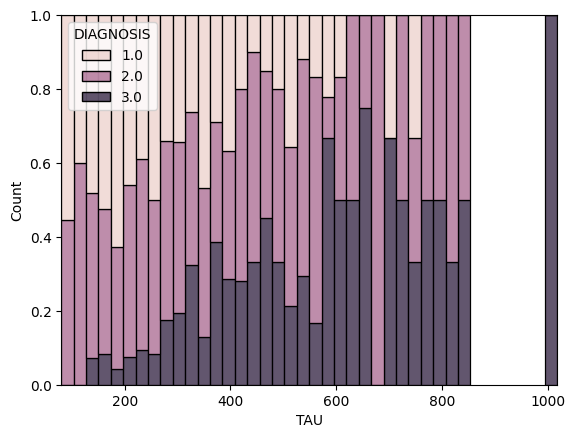

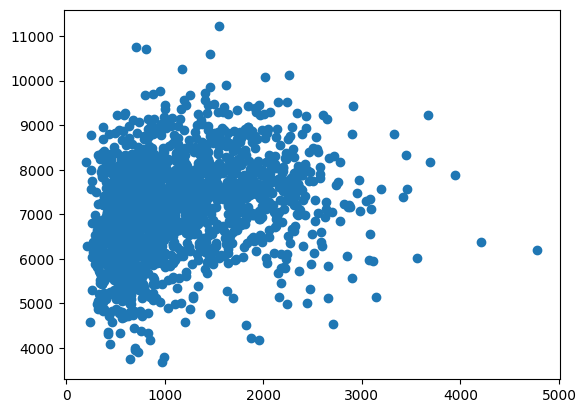

In [122]:
import matplotlib.pyplot as plt
sns.histplot(data=closest_match, x='TAU', hue='DIAGNOSIS', multiple='fill')
plt.show()

plt.scatter(closest_match['ABETA42'], closest_match['Hippocampus'])

In [33]:
# cols = ['RID', 'EXAMDATE_x', 'AGE', 'PTEDUCAT', 'PTGENDER', 
#         # 'PTRACCAT', 
#         'APOE41', 'Intracranial Volume','Hippocampus', 'Amygdala', 'Temporal Lobe',
#         # 'Thalamus',
#         'pT217_F', 'NfL_Q', 'GFAP_Q', 'AB42_F', 'AB40_F', 'TOTAL13', 'MMSCORE']

cols = ['RID', 'EXAMDATE_x',  'AGE','PTGENDER', 'PTEDUCAT',  'APOE41',

       'Intracranial Volume', 'Hippocampus', 'Amygdala', 'Temporal Lobe',
'ABETA42', 'TAU', 'PTAU',
       'TOTAL13', 'MMSCORE']


# cols = ['RID',  'EXAMDATE_x','AGE', 'PTGENDER', 'PTEDUCAT', 'PTRACCAT', 'APOE41',
# 'Intracranial Volume', 'Hippocampus', 'Amygdala',
#        'Temporal Lobe', 'pT217_F', 'AB42_F', 'AB40_F','NfL_Q', 'GFAP_Q', 
#        'TOTAL13', 'MMSCORE']
closest_match = closest_match[cols]
closest_match = closest_match.dropna()

In [34]:
closest_match

,RID,EXAMDATE_x,AGE,PTGENDER,PTEDUCAT,APOE41,Intracranial Volume,Hippocampus,Amygdala,Temporal Lobe,ABETA42,TAU,PTAU,TOTAL13,MMSCORE
7611,4943,2012-09-06,76.098563,1.0,20.0,1.0,2.735175e+06,8354.3,3239.3,75150.0,443.8,267.1,26.51,37.67,26.0
8890,6621,2018-10-29,57.494867,2.0,16.0,1.0,1.309246e+06,6993.8,2822.9,65870.0,1203.0,181.9,16.21,9.00,30.0
8894,4589,2012-03-05,75.173169,2.0,14.0,0.0,1.574127e+06,7167.5,1999.2,67770.0,805.3,268.1,24.39,20.67,26.0
8919,4605,2012-03-12,84.698152,2.0,17.0,0.0,1.512150e+06,6169.7,2237.1,73033.0,817.7,317.9,28.01,4.33,29.0
6825,5078,2013-02-01,67.419576,2.0,16.0,0.0,1.423192e+06,6932.9,2649.7,66504.0,1321.0,139.4,11.44,5.67,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9181,4646,2012-07-05,61.095140,2.0,16.0,1.0,1.394574e+06,6981.7,3210.5,82088.0,1105.0,484.7,39.17,23.67,30.0
9850,4268,2012-01-04,63.843943,2.0,15.0,0.0,1.424622e+06,7761.4,2749.1,62709.0,1350.0,151.6,14.27,11.67,29.0
3117,6437,2018-09-20,76.632444,1.0,16.0,0.0,1.373506e+06,7681.5,3021.9,76532.0,1503.0,166.0,14.63,6.00,29.0
9763,4887,2012-11-02,74.088980,1.0,12.0,1.0,1.240835e+06,6024.7,2414.1,78177.0,818.3,216.5,21.33,27.33,26.0


In [35]:
# one hot encode PTRACCAT
closest_match = pd.get_dummies(closest_match, columns=['PTRACCAT'], drop_first=True)

KeyError: "None of [Index(['PTRACCAT'], dtype='object')] are in the [columns]"

In [124]:
closest_match.columns

Index(['RID', 'EXAMDATE_x', 'AGE', 'PTGENDER', 'PTEDUCAT', 'APOE41',
       'Intracranial Volume', 'Hippocampus', 'Amygdala', 'Temporal Lobe',
       'pT217_F', 'AB42_F', 'AB40_F', 'NfL_Q', 'GFAP_Q', 'TOTAL13', 'MMSCORE',
       'PTRACCAT_1|7', 'PTRACCAT_2', 'PTRACCAT_2|4', 'PTRACCAT_4',
       'PTRACCAT_5', 'PTRACCAT_6', 'PTRACCAT_7', 'PTRACCAT_9'],
      dtype='object')

In [125]:
# drop all rows for which PTRACCAT_2 or PTRACCAT_3 is True
closest_match = closest_match[~(closest_match['PTRACCAT_1|7'] | closest_match['PTRACCAT_2|4'] |  closest_match['PTRACCAT_9'] | closest_match['PTRACCAT_7'] | closest_match['PTRACCAT_6'] )]
closest_match = closest_match.drop(columns=['PTRACCAT_1|7', 'PTRACCAT_2|4', 'PTRACCAT_9', 'PTRACCAT_7', 'PTRACCAT_6' ])
closest_match

,RID,EXAMDATE_x,AGE,PTGENDER,PTEDUCAT,APOE41,Intracranial Volume,Hippocampus,Amygdala,Temporal Lobe,pT217_F,AB42_F,AB40_F,NfL_Q,GFAP_Q,TOTAL13,MMSCORE,PTRACCAT_2,PTRACCAT_4,PTRACCAT_5
1617,7092,2022-06-23,68.558522,1.0,15.0,0.0,1.552508e+06,7491.2,3032.3,73605.0,0.133,23.48,274.18,11.2,141.2,12.67,30.0,False,True,False
1978,6419,2018-06-13,75.613963,1.0,14.0,1.0,1.375798e+06,7306.3,2961.3,68435.0,0.123,26.90,349.81,12.7,143.5,7.33,29.0,False,False,True
1972,6362,2018-05-08,82.934976,2.0,18.0,0.0,1.223461e+06,7401.0,3449.9,68006.0,0.067,24.14,238.53,18.7,126.7,3.00,30.0,True,False,False
1956,6761,2019-06-19,69.133470,1.0,12.0,0.0,1.485886e+06,8485.7,3580.8,82819.0,0.054,20.83,211.52,11.0,56.8,9.67,28.0,False,False,True
1948,4566,2012-02-29,83.493498,2.0,12.0,1.0,1.465920e+06,7552.4,2988.6,67114.0,0.133,17.51,201.63,16.8,321.4,11.67,29.0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
689,7032,2022-02-23,77.144422,1.0,16.0,0.0,1.622116e+06,5965.6,2225.9,79264.0,0.807,24.04,324.08,31.0,467.0,23.00,27.0,False,False,True
1199,4638,2012-06-15,74.291581,1.0,17.0,0.0,1.446604e+06,7695.0,3222.7,78544.0,0.189,35.42,349.02,32.6,114.6,19.67,28.0,False,False,True
899,7029,2022-02-15,60.038330,2.0,14.0,0.0,1.384684e+06,6846.3,2763.8,73510.0,0.098,32.93,329.87,14.1,120.2,7.67,30.0,False,True,False
1096,6989,2021-10-26,68.320329,2.0,16.0,0.0,1.203910e+06,6308.6,2842.2,69979.0,0.288,24.49,354.87,21.0,194.7,13.33,24.0,False,True,False


In [134]:
closest_match_singular

,AGE,PTEDUCAT,PTGENDER,APOE41,Intracranial Volume,Hippocampus,Amygdala,Temporal Lobe,pT217_F,AB42_F,AB40_F,NfL_Q,GFAP_Q,TOTAL13,MMSCORE
509,80.960986,18.0,1.0,1.0,1.413627e+06,7441.3,2900.6,64040.0,0.291,32.80,331.38,29.8,106.30,9.00,29.0
1505,83.036277,20.0,1.0,0.0,1.487053e+06,7510.9,3330.0,84398.0,0.153,28.36,290.37,17.6,110.10,5.33,30.0
383,83.238877,20.0,1.0,1.0,1.431759e+06,7372.3,3497.5,74938.0,0.155,27.57,356.44,26.4,200.30,15.00,29.0
2274,82.406571,17.0,1.0,0.0,1.389582e+06,6815.2,2928.0,69024.0,0.189,32.64,296.28,14.4,90.68,12.00,28.0
1651,81.056810,18.0,1.0,1.0,2.554488e+06,4810.5,1552.3,53438.0,0.482,25.94,349.12,24.3,315.50,23.00,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2330,57.256674,16.0,2.0,0.0,1.507782e+06,7800.2,3389.0,82904.0,0.080,24.85,267.84,10.5,118.90,3.33,29.0
1917,60.197125,18.0,2.0,1.0,1.236048e+06,6460.1,2893.6,63112.0,0.065,24.82,276.78,11.2,112.60,4.00,28.0
2403,74.600958,16.0,2.0,0.0,1.467947e+06,9068.6,3450.8,70435.0,0.135,35.61,342.46,11.6,232.20,11.33,29.0
2337,68.950034,18.0,1.0,1.0,1.466964e+06,6552.1,2593.1,71448.0,1.009,21.09,293.29,21.3,194.70,20.67,24.0


In [36]:
closest_match = closest_match.sort_values(by=['RID', 'EXAMDATE_x'])
closest_match_singular = closest_match.drop_duplicates(subset=['RID'])

In [127]:
cols = ['RID', 'EXAMDATE_x', 'AGE','PTEDUCAT', 'PTGENDER','APOE41',
       'Intracranial Volume', 'Hippocampus', 'Amygdala', 'Temporal Lobe',
       'pT217_F', 'AB42_F', 'AB40_F', 'NfL_Q', 'GFAP_Q', 'TOTAL13', 'MMSCORE']

In [130]:
closest_match = closest_match[cols]
closest_match_singular = closest_match_singular[cols]

In [135]:
cols_singular = ['AGE','PTEDUCAT', 'PTGENDER','APOE41',
       'Intracranial Volume', 'Hippocampus',
       'pT217_F', 'AB42_F', 'AB40_F', 'NfL_Q', 'GFAP_Q', 'TOTAL13', 'MMSCORE']
closest_match_singular = closest_match_singular[cols_singular]

In [38]:
import numpy as np
import pandas as pd

# Sort by patient and time (important for alignment)
df = closest_match

# Get unique patients and max timepoints
patients = df["RID"].unique()
n_patients = len(patients)
max_timepoints = df.groupby("RID").size().max()

# Extract variables
variables = [c for c in df.columns if c not in ["RID", "EXAMDATE_x"]]
n_vars = len(variables)

# Initialize array with NaNs
arr = np.full((max_timepoints, n_patients, n_vars), np.nan)

# Fill the array
for i, pid in enumerate(patients):
    subdf = df[df["RID"] == pid].sort_values("EXAMDATE_x")
    values = subdf[variables].to_numpy()
    arr[:len(values), i, :] = values

print("Array shape:", arr.shape)
print(arr)


Array shape: (6, 1162, 13)
[[[78.82819986  2.         18.         ... 26.1         4.
   30.        ]
  [78.18206708  2.         15.         ... 22.39       13.
   28.        ]
  [80.43258042  2.         18.         ... 15.79        1.67
   30.        ]
  ...
  [73.35797399  2.         20.         ... 14.78       12.
   30.        ]
  [80.44353183  2.         18.         ... 14.3        42.33
   21.        ]
  [77.46475017  1.         14.         ... 23.29       12.33
   27.        ]]

 [[        nan         nan         nan ...         nan         nan
           nan]
  [        nan         nan         nan ...         nan         nan
           nan]
  [81.41820671  2.         18.         ... 16.93        2.33
   30.        ]
  ...
  [        nan         nan         nan ...         nan         nan
           nan]
  [        nan         nan         nan ...         nan         nan
           nan]
  [        nan         nan         nan ...         nan         nan
           nan]]

 [[      

In [39]:
# check number of non-nans for each time point
for t in range(arr.shape[0]):
    non_nans = np.sum(~np.isnan(arr[t, :, 6]))
    print(f"Time point {t}: {non_nans} non-NaN entries")

Time point 0: 1162 non-NaN entries
Time point 1: 387 non-NaN entries
Time point 2: 95 non-NaN entries
Time point 3: 28 non-NaN entries
Time point 4: 8 non-NaN entries
Time point 5: 1 non-NaN entries


In [40]:
np.save('../data/actual_data/csf_longtid.npy', arr)

In [867]:
np.save('../data/merged_array_bloods_race.npy', arr)

In [ ]:
# closest_match_singular = closest_match_singular.iloc[:, 2:]
# closest_match_singular.to_csv('../data/merged_data_singular.csv', index=False)

In [406]:
# find how many RIDs appear 2 times
closest_match['RID'].value_counts().sort_values(ascending=False).value_counts()

count
1    716
2    112
Name: count, dtype: int64

In [407]:
duplicated_rids = closest_match[closest_match.duplicated(subset=['RID'], keep=False)]
duplicated_rids

,RID,EXAMDATE_x,AGE,PTEDUCAT,PTGENDER,PTRACCAT,APOE41,pT217_F,NfL_Q,GFAP_Q,AB42_F,AB40_F,Intracranial Volume,Hippocampus,Amygdala,Temporal Lobe,Thalamus,TOTAL13,MMSCORE
682,4039,2013-06-25,58.067077,19.0,1.0,5,1.0,1.405,24.6,255.0,23.88,295.64,1.397434e+06,6342.0,2647.4,50371.0,11752.2,64.33,13.0
720,7055,2024-10-17,72.544832,16.0,1.0,4,0.0,0.244,11.9,123.5,22.58,290.70,1.429985e+06,8611.8,3469.2,78881.0,11621.7,5.67,29.0
670,6145,2023-11-28,76.325804,16.0,2.0,5,0.0,0.175,21.0,209.9,36.32,312.56,1.434003e+06,6546.0,2900.0,77210.0,12098.6,4.33,29.0
723,853,2007-09-17,87.876797,16.0,1.0,5,0.0,0.206,23.0,312.4,23.95,296.36,1.536266e+06,5167.6,3261.5,64212.0,11157.4,30.00,21.0
759,78,2007-07-24,77.642710,18.0,2.0,5,1.0,1.264,47.7,504.1,27.23,305.59,1.652770e+06,6346.8,2386.1,64790.0,11846.8,72.00,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4077,4071,2011-08-23,84.807666,13.0,1.0,5,0.0,0.092,19.2,186.2,19.71,267.95,1.911021e+06,8342.9,3365.3,79131.0,14752.3,17.67,24.0
4419,4765,2017-08-29,81.242984,16.0,1.0,5,1.0,0.293,-5.0,-5.0,-4.00,-4.00,1.423040e+06,6455.6,1805.4,67607.0,11331.9,46.67,16.0
2339,6995,2021-12-06,58.929500,18.0,2.0,2,0.0,0.079,10.7,166.3,24.65,237.49,1.481552e+06,8180.9,3634.5,84222.0,16229.1,10.33,29.0
1835,6145,2018-03-14,70.617385,16.0,2.0,5,0.0,0.128,15.4,125.7,28.59,283.28,1.391597e+06,6376.5,2986.3,76307.0,11966.0,6.67,30.0
